In [2]:
import pandas as pd
import numpy as np

# Загрузка данных из файла Excel
file_path = 'En_In.xls' 
data = pd.read_excel(file_path, skiprows=17, usecols="C:F", 
                     names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'])

data['Energy Supply'] = np.where(data['Energy Supply'] == "...", np.nan, data['Energy Supply'])

# Преобразование в числовой тип
data['Energy Supply'] = pd.to_numeric(data['Energy Supply'], errors='coerce')

# Преобрание в гигаджоули
data['Energy Supply'] = data['Energy Supply'] * 1e6

# Переименование стран
data['Country'] = data['Country'].replace({
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
})

# Удаление цифр и текста в скобках
data['Country'] = data['Country'].str.replace(r'\d+|\s\([^)]*\)', '', regex=True)

# Фильтрация данных 
filtered_data = data.loc[data['Country'].isin(['American Samoa', 'South Korea', 'Bolivia'])]

# Просмотр результата
filtered_data

,Country,Energy Supply,Energy Supply per Capita,% Renewable
3,American Samoa,NaN,...,0.641026
24,Bolivia,3.360000e+08,32,31.477120
164,South Korea,1.100700e+10,221,2.279353


In [46]:
# Загрузка данных о ВВП
gdp_data = pd.read_csv('gpd.csv', skiprows=4)

# Переименование стран
gdp_data['Country Name'] = gdp_data['Country Name'].replace({
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
})

# Проверка данных
gdp_data.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
2,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
3,Angola,AGO,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
4,Albania,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10


In [28]:
#загрузка данных Scimago
scimago_data = pd.read_excel('scimagojr.xlsx')

# Проверка загрузки
scimago_data.head()

# Ограничение Scimagojr до стран с рангом от 1 до 15
top_countries = scimago_data[scimago_data['Rank'] <= 15]

# Фильтрация данных о ВВП на последние 10 лет
gdp_last_10_years = gdp_data[['Country Name', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]

# Переименование столбца для объединения
gdp_last_10_years = gdp_last_10_years.rename(columns={'Country Name': 'Country'})

# Объединение всех данных
combined_data = pd.merge(top_countries, data, how='inner', on='Country')
combined_data = pd.merge(combined_data, gdp_last_10_years, how='inner', on='Country')

# Установка названия страны в качестве индекса
combined_data.set_index('Country', inplace=True)

# Обновляем названия стран в Energy и GDP для совпадения
data['Country'] = data['Country'].replace({
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom"
})

gdp_data['Country Name'] = gdp_data['Country Name'].replace({
    "United States": "United States",
    "United Kingdom": "United Kingdom"
})


# Выбираем только нужные столбцы и ограничиваем топ-15 стран
result = combined_data[['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 
                        'Citations per document', 'H index', 'Energy Supply', 
                        'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', 
                        '2009', '2010', '2011', '2012', '2013', '2014', '2015']].sort_values(by='Rank').head(15)

# Проверка результата: должны быть 15 строк и 20 столбцов
print(result.shape)
result.head()



(15, 20)


,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93,19.75491,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286,11.57098,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149,10.23282,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124,10.60047,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214,17.28868,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12


In [30]:
def task_eight():
    # Вычисляем средний ВВП (GDP) за последние 10 лет для каждой страны
    avg_gdp = result[['2006', '2007', '2008', '2009', '2010', 
                      '2011', '2012', '2013', '2014', '2015']].mean(axis=1)
    
    # Создаем Series с индексом страны и сортируем по убыванию
    avg_gdp_series = avg_gdp.sort_values(ascending=False)
    avg_gdp_series.name = "avgGDP"
    return avg_gdp_series

# Вызов функции и проверка результата
task_eight_result = task_eight()
print(task_eight_result)


Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: avgGDP, dtype: float64


In [32]:
def task_nine():
    # Получаем серию среднего ВВП из предыдущего задания
    avg_gdp_series = task_eight()
    
    # Находим страну с 5-м по величине средним ВВП
    fifth_country = avg_gdp_series.index[4]  # 0-based index, пятая страна - index[4]
    
    # Вычисляем разницу ВВП за 10 лет (2006 - 2015) для этой страны
    gdp_difference = result.loc[fifth_country, '2015'] - result.loc[fifth_country, '2006']
    
    # Возвращаем кортеж
    return (fifth_country, gdp_difference)

# Вызов функции и проверка результата
task_nine_result = task_nine()
print(task_nine_result)


('France', 153345695364.24023)


In [34]:
def task_ten():
    # Находим строку с максимальным значением в столбце '% Renewable'
    max_renewable_country = result['% Renewable'].idxmax()  # Получаем название страны
    max_renewable_value = result['% Renewable'].max()  # Максимальное значение
    
    # Возвращаем кортеж
    return (max_renewable_country, max_renewable_value)

# Вызов функции и проверка результата
task_ten_result = task_ten()
print(task_ten_result)


('Brazil', 69.64803)


In [36]:
def task_eleven():
    # Создаем новый столбец для оценки численности населения
    result['Estimated Population'] = result['Energy Supply'] / result['Energy Supply per Capita']
    
    # Сортируем страны по населению
    sorted_population = result['Estimated Population'].sort_values(ascending=False)
    
    # Находим шестую страну в списке
    sixth_country = sorted_population.index[5]  # 0-based index, шестая страна - index[5]
    sixth_population = sorted_population.iloc[5]  # Значение численности населения
    
    # Возвращаем кортеж
    return (sixth_country, sixth_population)

# Вызов функции и проверка результата
task_eleven_result = task_eleven()
print(task_eleven_result)


('Japan', 127409395.97315437)


In [38]:
def task_twelve():
    # Создаем новый столбец: количество цитируемых документов на душу населения
    result['Citations per Capita'] = result['Citations'] / result['Estimated Population']
    
    # Вычисляем корреляцию Пирсона между двумя столбцами
    correlation = result['Citations per Capita'].corr(result['Energy Supply per Capita'])
    
    # Возвращаем корреляцию
    return correlation

# Вызов функции и проверка результата
task_twelve_result = task_twelve()
print(task_twelve_result)


0.6668248468590926


In [40]:
def task_thirteen():
    # Вычисляем медиану для столбца '% Renewable'
    median_renewable = result['% Renewable'].median()
    
    # Создаем новый столбец с 1 и 0
    result['HighRenew'] = (result['% Renewable'] >= median_renewable).astype(int)
    
    # Сортируем по Rank и возвращаем только столбец 'HighRenew'
    sorted_series = result.sort_values('Rank')['HighRenew']
    
    return sorted_series

# Вызов функции и проверка результата
task_thirteen_result = task_thirteen()
print(task_thirteen_result)


Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int32


In [42]:
def task_fourteen():
    # Добавляем столбец с континентами на основе словаря ContinentDict
    ContinentDict = {
        'China': 'Asia',
        'United States': 'North America',
        'Japan': 'Asia',
        'United Kingdom': 'Europe',
        'Russian Federation': 'Europe',
        'Canada': 'North America',
        'Germany': 'Europe',
        'India': 'Asia',
        'France': 'Europe',
        'South Korea': 'Asia',
        'Italy': 'Europe',
        'Spain': 'Europe',
        'Iran': 'Asia',
        'Australia': 'Australia',
        'Brazil': 'South America'
    }
    
    # Создаем новый столбец Continent
    result['Continent'] = result.index.map(ContinentDict)
    
    # Группируем данные по континентам
    grouped = result.groupby('Continent')['Estimated Population']
    
    # Создаем DataFrame с требуемыми столбцами
    summary_df = grouped.agg(['size', 'sum', 'mean', 'std'])
    
    # Округляем числовые значения
    summary_df = summary_df.round(3)
    
    # Возвращаем итоговый DataFrame
    return summary_df

# Вызов функции и проверка результата
task_fourteen_result = task_fourteen()
print(task_fourteen_result)



               size               sum              mean           std
Continent                                                            
Asia              5   2898666386.6106   579733277.32212  6.790979e+08
Australia         1   23316017.316017   23316017.316017           NaN
Europe            6  457929667.216372   76321611.202729  3.464767e+07
North America     2   352855249.48025  176427624.740125  1.996696e+08
South America     1  205915254.237288  205915254.237288           NaN


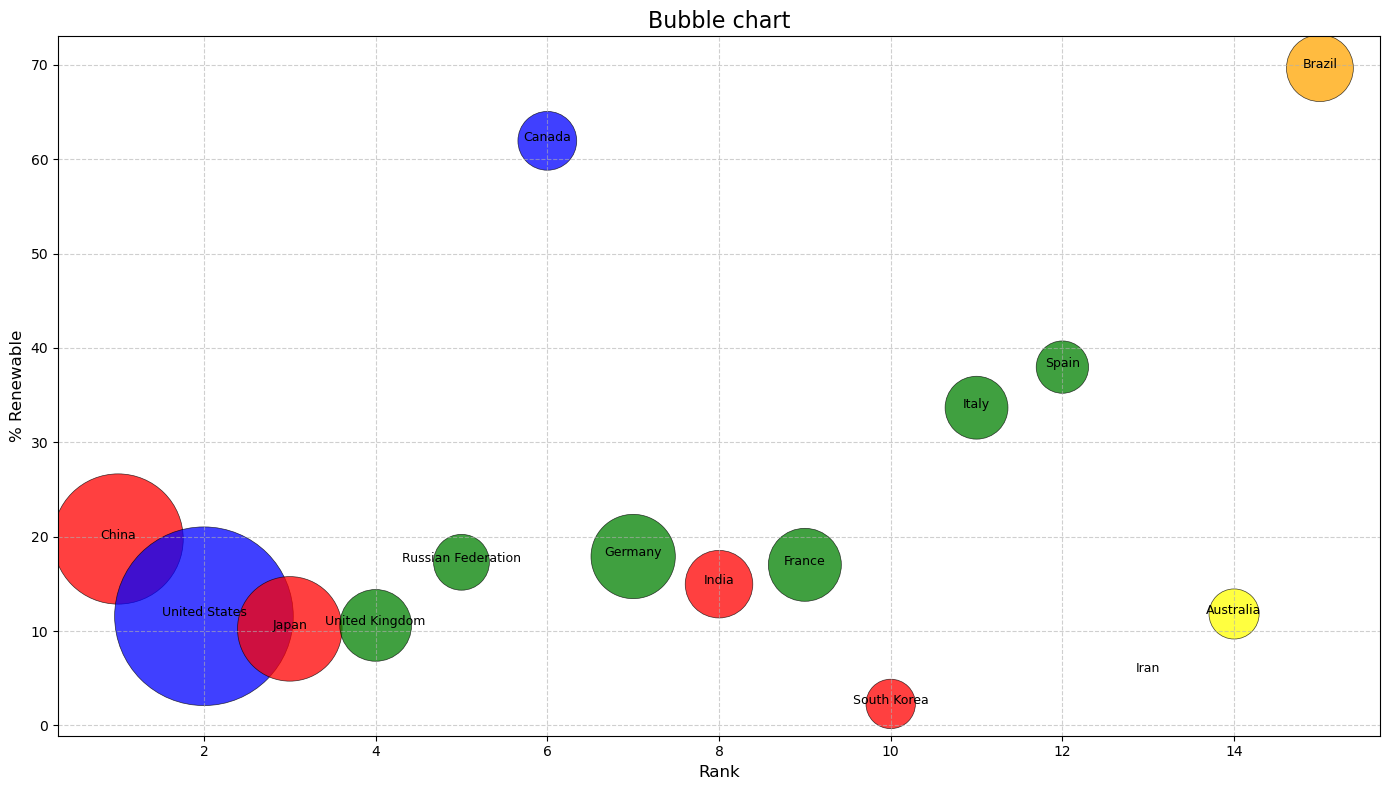

In [44]:
def task_fifteen():
    import matplotlib.pyplot as plt

    # Словарь цветов для континентов
    colors = {
        'Asia': 'red',
        'North America': 'blue',
        'Europe': 'green',
        'Australia': 'yellow',
        'South America': 'orange'
    }

    # Определение ContinentDict
    ContinentDict = {
        'China': 'Asia',
        'United States': 'North America',
        'Japan': 'Asia',
        'United Kingdom': 'Europe',
        'Russian Federation': 'Europe',
        'Canada': 'North America',
        'Germany': 'Europe',
        'India': 'Asia',
        'France': 'Europe',
        'South Korea': 'Asia',
        'Italy': 'Europe',
        'Spain': 'Europe',
        'Iran': 'Asia',
        'Australia': 'Australia',
        'Brazil': 'South America'
    }

    # Убедимся, что 'Color' и 'Continent' правильно добавлены
    result['Continent'] = result.index.map(ContinentDict)
    result['Color'] = result['Continent'].map(colors)

    # Фильтрация данных для существующих стран (проверим наличие всех топ-15 стран)
    required_countries = [
        'China', 'United States', 'Japan', 'United Kingdom', 'Russian Federation',
        'Canada', 'Germany', 'India', 'France', 'South Korea', 'Italy', 'Spain',
        'Iran', 'Australia', 'Brazil'
    ]
    # Убедимся, что все необходимые страны присутствуют
    existing_countries = [country for country in required_countries if country in result.index]
    filtered_result = result.loc[existing_countries]

    # Построение пузырьковой диаграммы
    plt.figure(figsize=(14, 8))
    plt.scatter(
        filtered_result['Rank'],  # Рейтинг
        filtered_result['% Renewable'],  # % Renewable
        s=filtered_result['2015'] / 1e9,  # Размер пузырька (масштабируем GDP)
        c=filtered_result['Color'],  # Цвет пузырьков
        alpha=0.75,  # Прозрачность
        edgecolors='k',  # Цвет границы
        linewidth=0.5
    )

    # Подписи стран
    for country in filtered_result.index:
        plt.text(
            filtered_result['Rank'][country],
            filtered_result['% Renewable'][country],
            country,
            fontsize=9,
            ha='center'
        )

    # Оформление графика
    plt.title('Bubble chart', fontsize=16)
    plt.xlabel('Rank', fontsize=12)
    plt.ylabel('% Renewable', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Вызов функции
task_fifteen()



